## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse = combined_data["Mouse ID"].nunique()
mouse

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse= combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicated_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
mouse_ids = duplicated_mouse["Mouse ID"].unique()
mouse_ids

array(['g989'], dtype=object)

In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data[~combined_data["Mouse ID"].isin(mouse_ids)]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
    

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
      

## Bar and Pie Charts

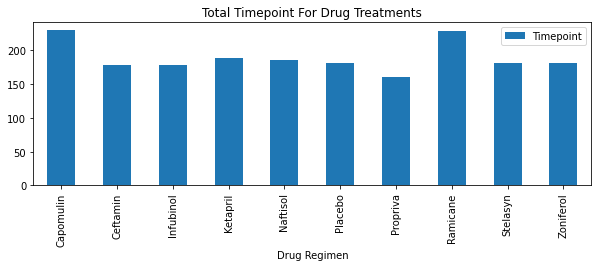

<Figure size 432x288 with 0 Axes>

In [113]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
      
drug_data = pd.DataFrame(combined_data.groupby(["Drug Regimen"]).count()).reset_index()

#Alter the dataframe down to two columns
drugs_df = drug_data[["Drug Regimen", "Timepoint"]]
drugs_df = drugs_df.set_index("Drug Regimen")


#Creating the bar chart
drugs_df.plot(kind="bar", figsize=(10,3))    #CHANGE COLOUR

plt.title("Total Timepoint For Drug Treatments")
plt.show()
plt.tight_layout() 




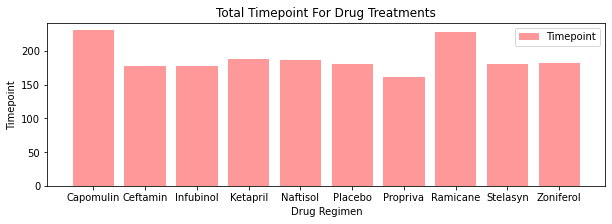

In [112]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_list = summary_df.index.tolist()
drug_list

#Turn drug_count into a list
timepoint_count = (combined_data.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()
timepoint_count

#Assign x-axis
x_axis = drug_list
#Creating and customizing bar chart
plt.figure(figsize=(10,3))
plt.bar(x_axis, timepoint_count, color='r', alpha=0.4, align="center", label="Timepoint")

plt.title("Total Timepoint For Drug Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

plt.legend(loc="best")


In [97]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = pd.DataFrame(combined_data.groupby(["Sex"]).count()).reset_index()
gender_df.head()


,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [98]:
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

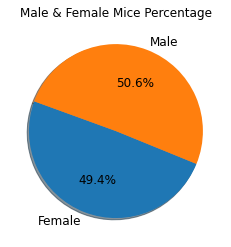

In [115]:
plt.figure(figsize=(11,4))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=160, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=12)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

#CHANGE COLOUR

(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

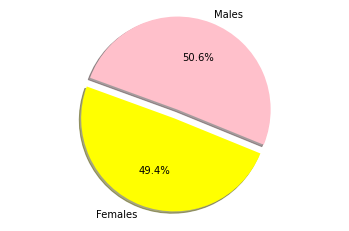

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (combined_data.groupby(["Sex"])["Mouse ID"].count()).tolist()
gender_count

labels = ["Females", "Males"]
colors = ["yellow", "pink"]
explode = (0.1, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")




## Quartiles, Outliers and Boxplots

In [109]:
maximum_time = pd.DataFrame(combined_data.groupby(["Timepoint"]).max())
maximum_time


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,,,,
0,z969,Zoniferol,Male,24,30,45.000000,0
5,z969,Zoniferol,Male,24,30,49.481949,1
10,z969,Zoniferol,Male,24,30,53.653970,2
15,z969,Zoniferol,Male,24,30,58.135545,3
20,z969,Zoniferol,Male,24,30,62.706031,4
25,z969,Zoniferol,Male,24,30,65.741777,4
30,z969,Zoniferol,Male,24,30,69.160520,4
35,z969,Zoniferol,Male,24,30,71.905117,4
40,z969,Zoniferol,Male,24,30,74.106091,4


In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
#groupby timepoint
 cleaned_df.groupby["Timepoint"].max()  

    # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
         #groupby tumor volume, timepoint, drug regimin and mouse id
    
    
    arranged_df = combined_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.head().reset_index()

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
    for treatment in treatments 


# Create empty list to fill with tumor vol data (for plotting)
Final_tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles =[.25,.5,.75]
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Treatments")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot()
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

comdined data.groupby('tumor volume')
.plot
time pint x axis
y axis tumor volume 



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


from scipy.stats import linregress

# Add the lineear regression equation and line to the scatter plot
x_values = avg_capo["Weight (g)"]
y_values = avg_capo["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()
